<a href="https://colab.research.google.com/github/lusamdebonfils/Machine-Learning/blob/main/610096_final_project_CS582.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description : # IEE Fraud Detection Final Project for Samuel Machine Learning
This Project is based off a previous Kaggle Competition to detect Fraudulent Transaction.

Imagine standing at the check-out counter at the grocery store with a long line behind you and the cashier not-so-quietly announces that your card has been declined. In this moment, you probably aren’t thinking about the data science that determined your fate.

Embarrassed, and certain you have the funds to cover everything needed for an epic nacho party for 50 of your closest friends, you try your card again. Same result. As you step aside and allow the cashier to tend to the next customer, you receive a text message from your bank. “Press 1 if you really tried to spend $500 on cheddar cheese.”

The challenge is to build a model that can predict unseen clients (not unseen time). So the idea is that we are not predicting fraudulent transactions using machine learning, we are predicting fraudulent clients (credit cards).

The data is broken into two files identity and transaction, which are joined by TransactionID. Not all transactions have corresponding identity information

###Importing Dependencies

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#from google.colab import files
#uploaded = files.upload()

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

### Loading Data

In [4]:
%%time
train_id = pd.read_csv("train_identity.csv")
train_tr = pd.read_csv("train_transaction.csv")
test_id = pd.read_csv("test_identity.csv")
test_tr = pd.read_csv("test_transaction.csv")

CPU times: user 38.7 s, sys: 12.3 s, total: 51 s
Wall time: 54.2 s


Displaying insights in the data

In [5]:
train_id.head(10)
test_id.head(10)

,TransactionID,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,id-10,id-11,id-12,id-13,id-14,id-15,id-16,id-17,id-18,id-19,id-20,id-21,id-22,id-23,id-24,id-25,id-26,id-27,id-28,id-29,id-30,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,Found,NaN,-300.0,Found,Found,166.0,NaN,542.0,368.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Android 6.0.1,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,-360.0,New,NotFound,225.0,NaN,271.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,27.0,NaN,Found,Found,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,567.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW
5,3663622,-5.0,36786.0,NaN,NaN,4.0,-2.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,-480.0,New,NotFound,166.0,15.0,352.0,177.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.4.0,mobile safari 11.0,32.0,2208x1242,match_status:2,T,F,F,T,mobile,iOS Device
6,3663624,-5.0,12577.0,0.0,0.0,2.0,-2.0,NaN,NaN,0.0,0.0,100.0,Found,27.0,-480.0,Found,Found,166.0,15.0,352.0,177.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,iOS 11.4.0,mobile safari 11.0,32.0,2208x1242,match_status:2,T,F,F,T,mobile,iOS Device
7,3663626,-5.0,44726.0,0.0,0.0,0.0,-2.0,NaN,NaN,0.0,0.0,100.0,Found,27.0,-480.0,Found,Found,166.0,15.0,352.0,177.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,iOS 11.4.0,mobile safari 11.0,32.0,2208x1242,match_status:2,T,F,F,T,mobile,iOS Device
8,3663629,-5.0,125997.0,0.0,0.0,2.0,-2.0,NaN,NaN,0.0,0.0,100.0,Found,27.0,-480.0,Found,Found,166.0,15.0,352.0,177.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,iOS 11.4.0,mobile safari 11.0,32.0,2208x1242,match_status:2,T,F,F,T,mobile,iOS Device
9,3663658,-5.0,98741.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,Found,27.0,-360.0,New,NotFound,166.0,NaN,529.0,214.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.4.0,mobile safari 11.0,32.0,2048x1536,match_status:2,T,F,F,F,mobile,iOS Device


In [6]:
train_tr.head(10)
test_tr.head(10)

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,299.0,87.0,4.0,NaN,aol.com,NaN,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,NaN,NaN,NaN,NaN,231.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,280.000000,77.000000,0.000000,280.000000,0.000000,77.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,472.0,87.0,2635.0,NaN,hotmail.com,NaN,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,NaN,NaN,NaN,NaN,136.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1321.000000,0.000000,0.000000,1058.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,263.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,205.0,87.0,17.0,NaN,gmail.com,NaN,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,NaN,NaN,NaN,NaN,242.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,282.540009,282.540009,282.540009,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,264.0,87.0,6.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,NaN,NaN,NaN,NaN,22.0,...,0.0,0.0,0.0,0.0,0.0,1.0,67.949997,183.850006,67.949997,67.949997,183.850006,67.949997,67.949997,67.949997,183.850006,67.949997,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3663554,18403323,57.95,W,12839,321.0,150.0,visa,226.0,debit,512.0,87.0,NaN,NaN,gmail.com,NaN,5.0,5.0,0.0,0.0,2.0,3.0,0.0,0.0,2.0,0.0,4.0,0.0,10.0,4.0,36.0,36.0,35.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.949997,107.949997,107.949997,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3663555,18403350,87.00,W,16560,476.0,150.0,visa,126.0,debit,110.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,0.0,0.0,0.0,1.0,261.000000,261.000000,261.000000,174.000000,174.000000,174.000000,174.000000,NaN,NaN,NaN,87.0,87.0,87.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3663556,18403387,390.00,W,15066,170.0,150.0,mastercard,102.0,credit,194.0,87.0,303.0,NaN,gmail.com,NaN,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,1.0,1.0,11.0,1.0,NaN,NaN,NaN,126.0,4.0,NaN,NaN,NaN,NaN,126.0,...,NaN,NaN,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,3663557,18403405,103.95,W,2803,100.0,150.0,visa,226.0,debit,494.0,87.0,3.0,NaN,gmail.com,NaN,152.0,148.0,0.0,0.0,135.0,95.0,0.0,0.0,77.0,0.0,122.0,0.0,407.0,108.0,128.0,128.0,13.0,644.0,13.0,NaN,NaN,NaN,NaN,106.0,...,0.0,0.0,0.0,0.0,

In [7]:
train_id.shape
test_id.shape

(141907, 41)

In [8]:
train_tr.shape
test_tr.shape

(506691, 393)

### Merge the data

In [9]:
train = pd.merge(
    train_tr,
    train_id,
    how="left",
    on="TransactionID",
    left_index=True,
    right_index=True,
)

test = pd.merge(
    test_tr,
    test_id,
    how="left",
    on="TransactionID",
    left_index=True,
    right_index=True,
)

In [10]:
train.isnull().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
id_36             449555
id_37             449555
id_38             449555
DeviceType        449730
DeviceInfo        471874
Length: 434, dtype: int64

In [11]:
test.isnull().sum()

TransactionID          0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
                   ...  
id-36             369714
id-37             369714
id-38             369714
DeviceType        369760
DeviceInfo        391634
Length: 433, dtype: int64

In [12]:
train.shape

(590540, 434)

In [13]:
test.shape

(506691, 433)

In [14]:
len(train[train["isFraud"]==1])/len(train)*100

3.4990009144173126

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

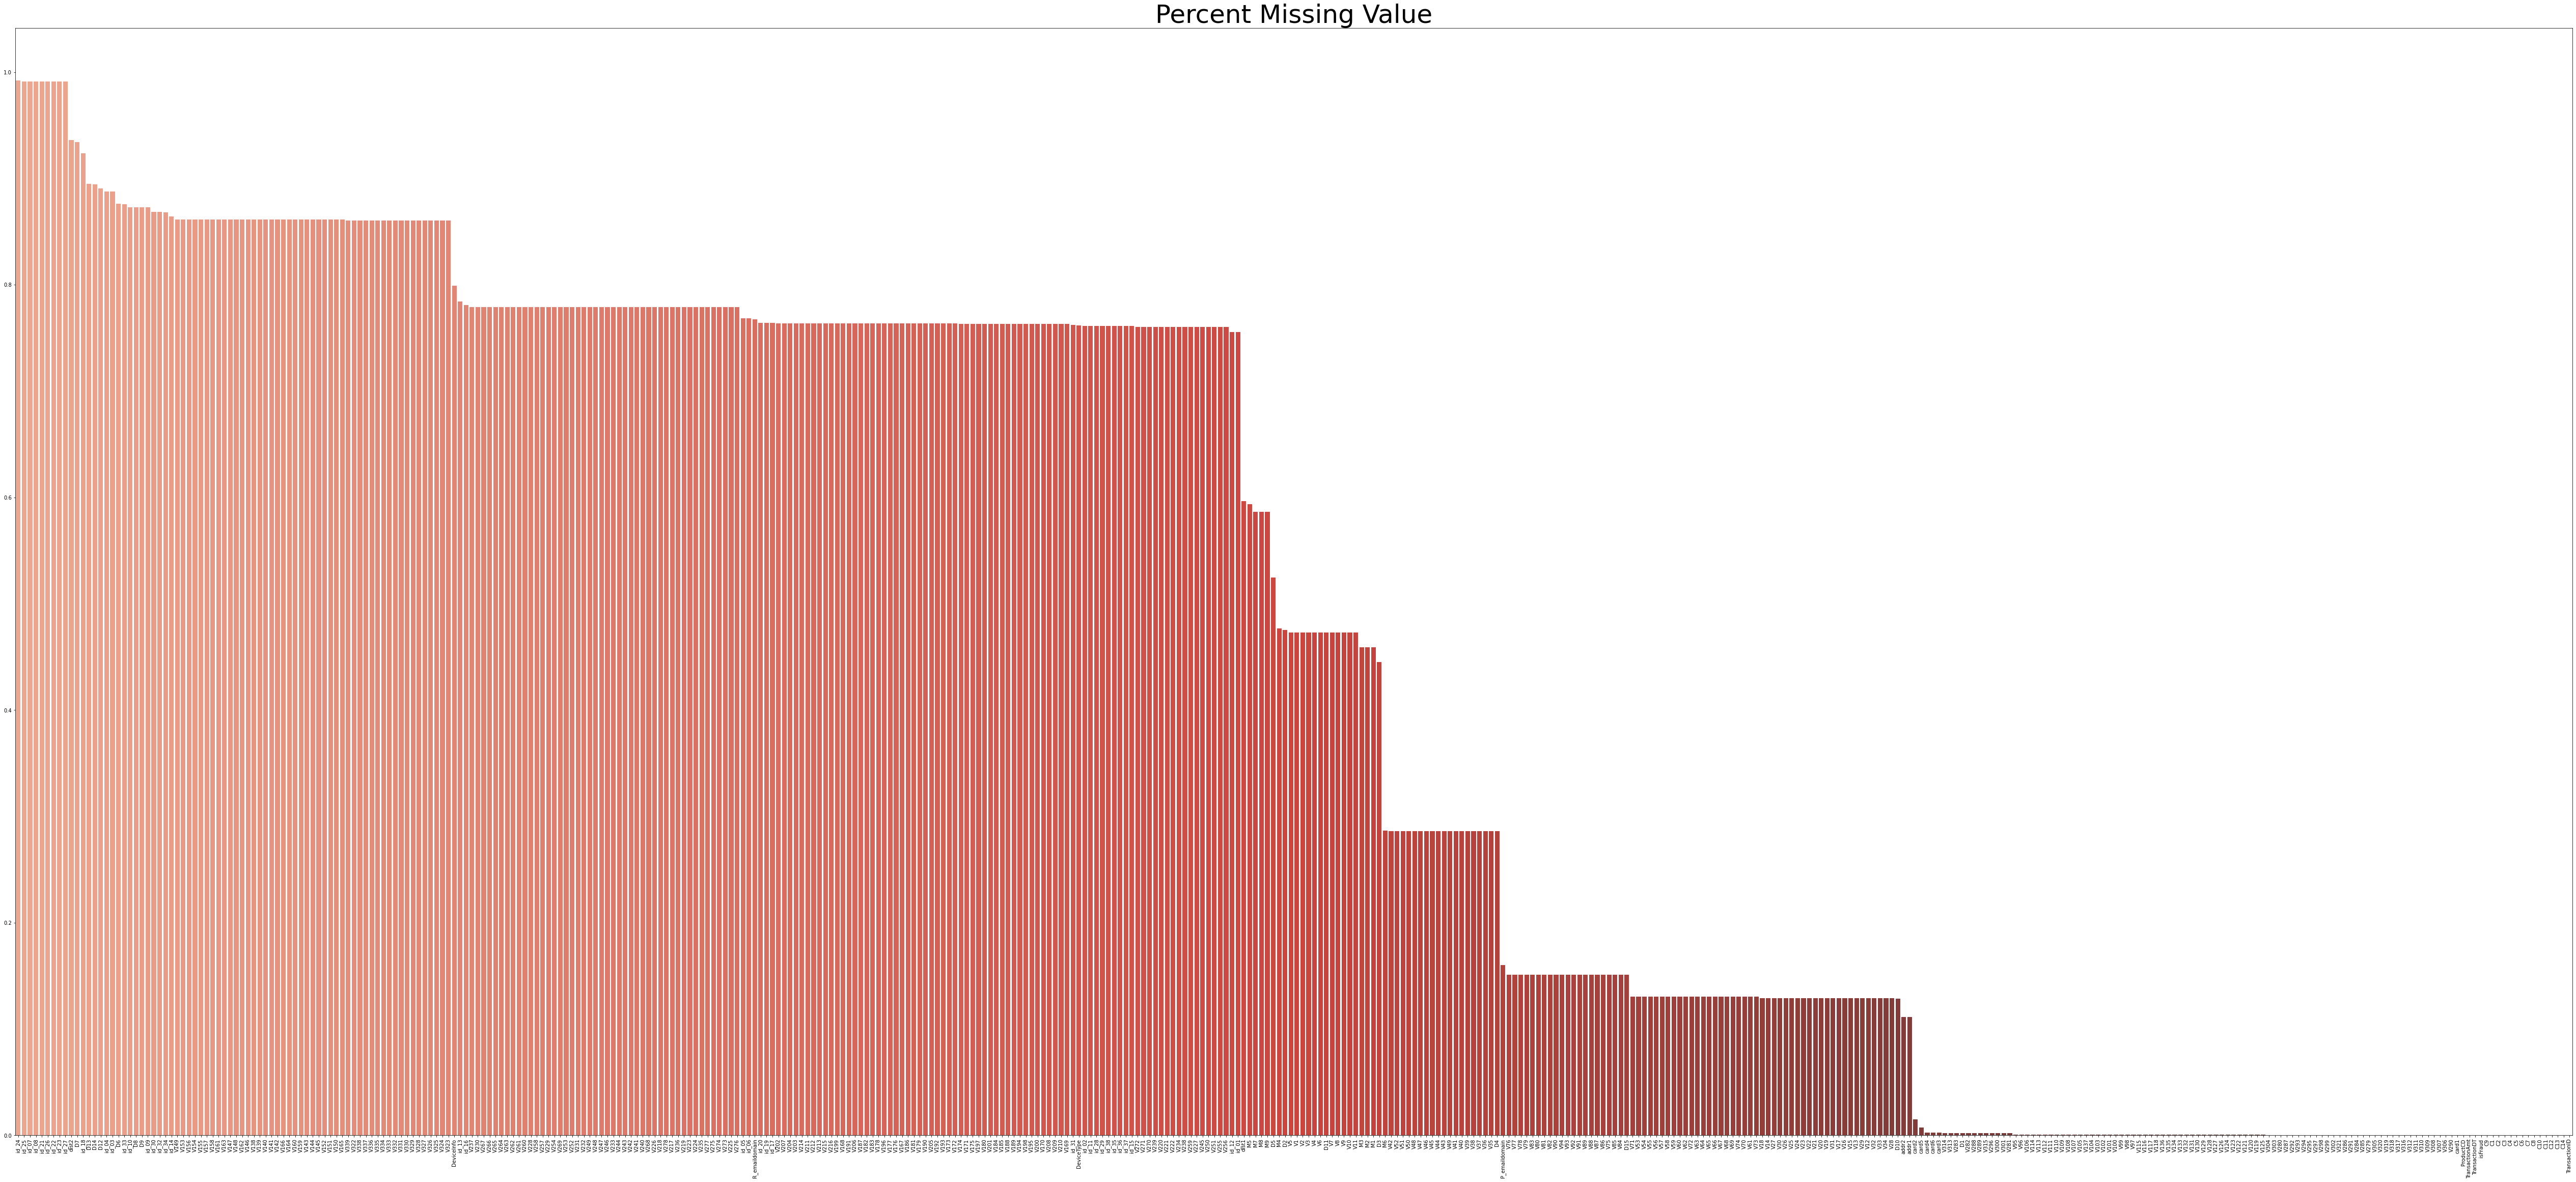

In [15]:
plt.figure(figsize=(90,40))
sns.barplot(y=train.isnull().sum().sort_values(ascending=False)/len(train),
            x=train.isnull().sum().sort_values(ascending=False).index,
            palette="Reds_d")
plt.title("Percent Missing Value",size=50)
plt.xticks(rotation=90)

In [16]:
#Feature selection to determine how the value of NA remove will affect how much data we stay with if we are to remove NAs
columns_def=pd.DataFrame({"na_count":train.isnull().sum().sort_values(ascending=False)})
columns_def["per"]=columns_def["na_count"]/len(train)
range=[0.05, 0.10 ,0.15, 0.25, 0.40, 0.60, 0.75]
for i in range: 
    print (columns_def[columns_def["per"]<i].shape[0]/train.shape[1])

0.25806451612903225
0.25806451612903225
0.3686635944700461
0.41935483870967744
0.46543778801843316
0.5207373271889401
0.5207373271889401


In [17]:
#Applying the limit of 15% to cut out NAs
limit=0.15
#Select final columns
columns_final=columns_def[columns_def["per"]<limit].index 
#Allow only 15% of NAs in the data
train_full_df=train[train.columns.intersection(columns_final)]

In [18]:
print(train_full_df.shape)

(590540, 160)


In [19]:
#Applying the same criteria to TestData
test_full_df=test[test.columns.intersection(columns_final)]

In [20]:
print(test_full_df.shape)

(506691, 159)


###Dealing with Categorical Variables

In [21]:
#Test Data
#Show categorical variables
test_full_df[test_full_df.select_dtypes(include=['object']).columns]

,ProductCD,card4,card6
0,W,visa,debit
1,W,visa,debit
2,W,visa,debit
3,W,visa,debit
4,W,mastercard,debit
...,...,...,...
506686,C,mastercard,debit
506687,C,mastercard,debit
506688,W,visa,debit
506689,W,mastercard,debit


#### Cleaning up categorical data and removing NA values

In [22]:
#Converts infinite values to NA
def clean_inf_nan(df):
    return df.replace([np.inf, -np.inf], np.nan)
clean_inf_nan(train_full_df)
clean_inf_nan(test_full_df)
### step2: Replace all NaN with 0
train_full_df.fillna(0, inplace=True)
test_full_df.fillna(0, inplace=True)

In [23]:
for col in train_full_df.columns:
    if train_full_df[col].dtype == "object":
        le = LabelEncoder()
        le.fit(list(train_full_df[col].astype(str).values) + list(test_full_df[col].astype(str).values))
        train_full_df[col] = le.transform(list(train_full_df[col].astype(str).values))
        test_full_df[col] = le.transform(list(test_full_df[col].astype(str).values))

In [24]:
#Shape
print(train_full_df.shape)
print(test_full_df.shape)

(590540, 160)
(506691, 159)


In [25]:
#Confirming percentages of Labels
len(train_full_df[train_full_df["isFraud"]==1])/len(train_full_df)*100

3.4990009144173126

In [26]:
X_train = train_full_df.drop("isFraud", axis=1).copy()
X_test = test_full_df.copy()
y_train = train_full_df["isFraud"].copy()

In [27]:
#Spliting the data
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_train, y_train, test_size=0.3, random_state=7
)

## **Now Enter our model**
I will use both Random Forest and AdaptiveBoost to compare the performance of both models
#### **1. Random Forest Classifier**


In [28]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [29]:
#Using Simple Random Forest
%%time
rf = RandomForestClassifier(
    max_depth=45, max_features=30, n_estimators=500, n_jobs=-1, min_samples_leaf=200
)
model_1 = rf.fit(X_train_split, y_train_split)
y_pred_1 = model_1.predict(X_test_split)



CPU times: user 49min 5s, sys: 2 s, total: 49min 7s
Wall time: 24min 53s


#####Cross Validation

In [30]:
print("Recall score:", recall_score(y_test_split, y_pred_1))
print("Roc Auc Score:", roc_auc_score(y_test_split, y_pred_1))
print("F1 - Measure:", f1_score(y_test_split, y_pred_1))

Recall score: 0.2182790471560525
Roc Auc Score: 0.6085985594337145
F1 - Measure: 0.34973386992081007


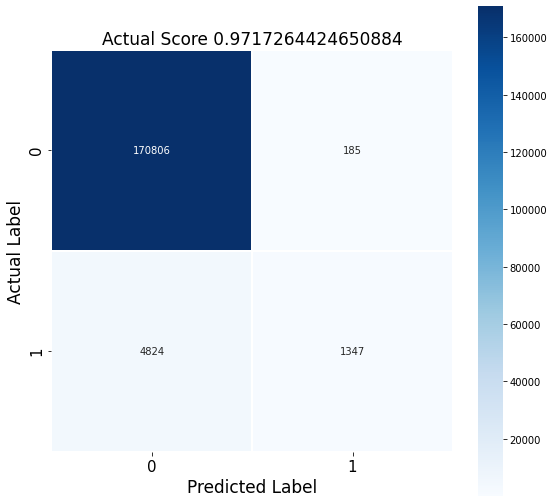

In [31]:
#Confusion matrix
from sklearn import metrics
score = accuracy_score(y_test_split, y_pred_1)
cm =  metrics.confusion_matrix(y_test_split, y_pred_1)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square=True,
            cmap='Blues'
            );
plt.ylabel('Actual Label',fontsize=17);
plt.xlabel('Predicted Label', fontsize=17);
plt.title('Actual Score {}'.format(score),size=17)
plt.tick_params(labelsize=15)

#### **2. Adapative Boosting aka AdaBoost**

In [32]:
%%time
AdaModel = AdaBoostClassifier(n_estimators=100, learning_rate=0.5)
model_2 = AdaModel.fit(X_train_split, y_train_split)
y_pred_2 = model_2.predict(X_test_split)

CPU times: user 3min 34s, sys: 1.36 s, total: 3min 35s
Wall time: 3min 36s


#####Cross Validation

In [34]:
print("Recall score:", recall_score(y_test_split, y_pred_1))
print("Roc Auc Score:", roc_auc_score(y_test_split, y_pred_1))
print("F1 - Measure:", f1_score(y_test_split, y_pred_1))

Recall score: 0.2182790471560525
Roc Auc Score: 0.6085985594337145
F1 - Measure: 0.34973386992081007


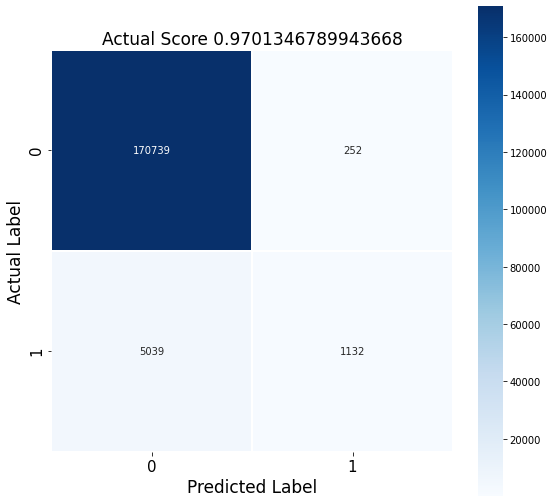

In [33]:
#Confusion matrix
from sklearn import metrics
score = accuracy_score(y_test_split, y_pred_2)
cm =  metrics.confusion_matrix(y_test_split, y_pred_2)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square=True,
            cmap='Blues'
            );
plt.ylabel('Actual Label',fontsize=17);
plt.xlabel('Predicted Label', fontsize=17);
plt.title('Actual Score {}'.format(score),size=17)
plt.tick_params(labelsize=15)

### 3. LightGBM Model 